## Final Project Submission

Please fill out:
* Student name: Lucy Wanjiru Njoroge
* Student pace: self paced / part time / full time : full time
* Scheduled project review date/time: 
* Instructor name:
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!bb


## SECTION A : BUSINESS UNDERSTANDING

Microsoft , an American multinational technology company, wishes to create original video content , which has become quite popular . The company wishes to achieve this by creating a new movie studio tasked with movie production.However, they do not know anything about creating movies and need insight on the kind of genres they will need to produce based on certain factors. This project will entail the analysis of  data provided from various sources such as IMDB and rotten tomatoes  to help generate insight on this project so that the genres recommended at the end of the analysis will be the best fit in terms of Box office performance

This analysis will revolve around finding the best genre of movies that the new Microsoft Movie studio can produce. The project will centre its analysis based on movie ratings , the gross money returns as well as do an in depth analysis on the relationship between Box office performance and the production costs to get an approximated project budget.

## SECTION B :DATA UNDERSTANDING

In [207]:
##Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

### 1. movie_budget_df

In [3]:
#acccessing the movie_budget_df dataframe 
movie_budget_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
movie_budget_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [6]:
movie_budget_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [7]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This dataset has 5782 rows and 6 columns with no missing values

In [8]:
#This also gives the number of rows and columns respectively in a tuple
movie_budget_df.shape

(5782, 6)

In [9]:
## Relationship between the variables
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The columns in the dataset are id,an integer value, release_date, movie, production_budget, domestic_gross and worldwide_gross which at this time are objects

The movie columns gives a list of the movies released , the production_budget is the budget cost of movie production and the domestic_gross and worldwide_gross columns are the income the movie has generated domestically and worldwide respectively. The id column is a way of identifying the rows

### 2. Im.db_df dataset

#### 2.1.Table1 :movie_ratings table

In [10]:
#connecting to the database
import sqlite3
conn = sqlite3.connect("zippedData/im.db/im.db")

In [11]:
#select all columns in the table
ratings_df = pd.read_sql("SELECT * FROM movie_ratings;" , conn)
ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [12]:
ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
ratings_df.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [14]:
ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [15]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


 This data frame has 73856 rows and 3 columns

In [16]:
#Also gives the number of rows and columns respectively in a tuple
ratings_df.shape

(73856, 3)

#### Relationship between the variables
The movie_id column will be used to identify the movie , while the averagerating column gives the average rating based on the number of votes in the numvotes column


#### 2.2. Table2 :movie_basics

In [17]:
movie_basics_df = pd.read_sql("SELECT * FROM movie_basics;" , conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [18]:
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [19]:
movie_basics_df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [20]:
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [21]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


This dataset has 146144 rows and 6 columns. Original_title,runtime_minutes and genres have missing values

In [22]:
movie_basics_df.shape

(146144, 6)

#### Relationship between variables
This dataset has the columns: movie_id which helps identify the variable name in the primary_title and original_title columns, The primary_title and original_title columns give the names  of the movies, the start_year column : year that the movie either started running or was produces , runtime_minutes: The duration of the movie and the genres column :the movie type.

##  DATA PREPARATION & CLEANING

 In this section , i will be checking for null and missing values  as well as duplicates and outliers.
 I will begin by merging my datasets and carrying out my data cleaning in the combined table. The data cleaning activities will involve getting rid of missing values, null values, duplicates and the outliers.

#### MERGING

### Begin by merging  Table 2 of the Im.db_df  dataset and the movie_df dataframe

In [23]:
merge_df = movie_basics_df.merge(movie_budget_df , how = "inner", left_on = "primary_title" , right_on = "movie")
merge_df

#The type of merge conducted is the inner merge based on the primary key "movie" and foreign key "primary_title " in the im.db dataset

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.0,None,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094"


The merged dataset between Table 2 of the Im.db_ dataset has been assigned the variable name merge_df. The next step will be to merge the dataset merge_df with Table 1 of the Im.db dataset. The merge was done in this order so as not to compromise the primary and foreign key values in the movie_df dataframe and Table 2 of the Im.db_dataset and limit the number of rows for the analysis. 

###  Merging the merge_df dataset with Table 1 of the im.db_df dataset

In [24]:
final_merge_df = merge_df.merge(ratings_df , how = "inner")
final_merge_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",1.9,8248
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",7.5,24
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",6.1,14828
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",6.1,37886
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",6.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8976472,Never Again,Ei koskaan enää,2018,69.0,"Documentary,Music",47,"Jul 12, 2002",Never Again,"$500,000","$307,631","$308,793",6.6,27
2871,tt8680254,Richard III,Richard III,2016,NaN,Drama,65,"Dec 29, 1995",Richard III,"$9,200,000","$2,684,904","$4,199,334",9.1,28
2872,tt8824064,Heroes,Heroes,2019,88.0,Documentary,12,"Oct 24, 2008",Heroes,"$400,000","$655,538","$655,538",7.3,7
2873,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621",6.3,5945


The final merge dataframe has been assigned the variable name final_merge_df, we can now begin with the actual data cleaning

### 1. Checking for null and missing values

In [25]:
#There are missing values in the runtime_minutes column as well as the genres column
final_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   id                 2875 non-null   int64  
 7   release_date       2875 non-null   object 
 8   movie              2875 non-null   object 
 9   production_budget  2875 non-null   object 
 10  domestic_gross     2875 non-null   object 
 11  worldwide_gross    2875 non-null   object 
 12  averagerating      2875 non-null   float64
 13  numvotes           2875 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 336.9+ KB


In [26]:
#The number of null values in each column can also be obtained by using the .isna() and .sum() methods
final_merge_df.isna().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes      118
genres                 8
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
averagerating          0
numvotes               0
dtype: int64

Once the columns with null values have been identified, based on the number of null values, I chose to drop the release_date column  since i will not be using it in my analysis and dropped the genre rows with missing values.

In [27]:
# Dropping the run_time minutes column
final_merge_df.drop(columns = "runtime_minutes" , axis = 1 , inplace = True)

In [28]:
final_merge_df

,movie_id,primary_title,original_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",1.9,8248
1,tt0326592,The Overnight,The Overnight,2010,None,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",7.5,24
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",6.1,14828
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",6.1,37886
4,tt4339118,On the Road,On the Road,2014,Drama,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",6.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8976472,Never Again,Ei koskaan enää,2018,"Documentary,Music",47,"Jul 12, 2002",Never Again,"$500,000","$307,631","$308,793",6.6,27
2871,tt8680254,Richard III,Richard III,2016,Drama,65,"Dec 29, 1995",Richard III,"$9,200,000","$2,684,904","$4,199,334",9.1,28
2872,tt8824064,Heroes,Heroes,2019,Documentary,12,"Oct 24, 2008",Heroes,"$400,000","$655,538","$655,538",7.3,7
2873,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621",6.3,5945


In [29]:
# Dropping the rows with null values
final_merge_df.dropna( axis = 0 , inplace = True)

In [30]:
final_merge_df

,movie_id,primary_title,original_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",1.9,8248
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",6.1,14828
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",6.1,37886
4,tt4339118,On the Road,On the Road,2014,Drama,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",6.0,6
5,tt5647250,On the Road,On the Road,2016,Drama,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",5.7,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8976472,Never Again,Ei koskaan enää,2018,"Documentary,Music",47,"Jul 12, 2002",Never Again,"$500,000","$307,631","$308,793",6.6,27
2871,tt8680254,Richard III,Richard III,2016,Drama,65,"Dec 29, 1995",Richard III,"$9,200,000","$2,684,904","$4,199,334",9.1,28
2872,tt8824064,Heroes,Heroes,2019,Documentary,12,"Oct 24, 2008",Heroes,"$400,000","$655,538","$655,538",7.3,7
2873,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621",6.3,5945


In [31]:
# Checking for null values
final_merge_df.isna().sum()

movie_id             0
primary_title        0
original_title       0
start_year           0
genres               0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
averagerating        0
numvotes             0
dtype: int64

There are no more null values in the final_merge_df dataset

### 2: extraneous values 

In [32]:
for col in final_merge_df.columns:
    print(col,"\n", final_merge_df[col].value_counts(normalize = True),"\n\n")

movie_id 
 tt1502407    0.001046
tt2545384    0.001046
tt2224026    0.001046
tt2372760    0.001046
tt4047846    0.001046
               ...   
tt2076875    0.000349
tt2704210    0.000349
tt7634968    0.000349
tt2609912    0.000349
tt1608290    0.000349
Name: movie_id, Length: 2745, dtype: float64 


primary_title 
 Home                                      0.008371
The Gift                                  0.005581
Brothers                                  0.005581
Crossroads                                0.004186
Hamlet                                    0.004186
                                            ...   
Incendies                                 0.000349
Beyond the Mat                            0.000349
Penguins of Madagascar                    0.000349
Alvin and the Chipmunks: The Road Chip    0.000349
The Overnight                             0.000349
Name: primary_title, Length: 2126, dtype: float64 


original_title 
 The Gift                        0.004883
Home       

There are no more missing or unknown values in our dataset

### 3:Duplicate values

In [33]:
duplicate_pd = pd.DataFrame((final_merge_df["primary_title"].unique()),columns = ["unique"])
duplicate_pd

,unique
0,Foodfight!
1,The Overnight
2,On the Road
3,The Secret Life of Walter Mitty
4,A Walk Among the Tombstones
...,...
2121,Never Again
2122,Richard III
2123,Heroes
2124,Unplanned


In [34]:
final_merge_df = final_merge_df.drop_duplicates(subset = ["primary_title"])
final_merge_df

,movie_id,primary_title,original_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",1.9,8248
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",6.1,14828
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",6.1,37886
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",7.3,275300
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",6.5,105116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,tt8662424,Never Again,Never Again,2017,Drama,47,"Jul 12, 2002",Never Again,"$500,000","$307,631","$308,793",5.7,67
2871,tt8680254,Richard III,Richard III,2016,Drama,65,"Dec 29, 1995",Richard III,"$9,200,000","$2,684,904","$4,199,334",9.1,28
2872,tt8824064,Heroes,Heroes,2019,Documentary,12,"Oct 24, 2008",Heroes,"$400,000","$655,538","$655,538",7.3,7
2873,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621",6.3,5945


The duplicated values in this dataset have been dropped based on the primary_title

### 4. Outliers

In [35]:
final_merge_df.describe()

,start_year,id,averagerating,numvotes
count,2126.000000,2126.000000,2126.000000,2.126000e+03
mean,2013.565851,50.570085,6.231326,8.222317e+04
std,2.510428,28.594784,1.142627,1.465652e+05
min,2010.000000,1.000000,1.600000,5.000000e+00
25%,2011.000000,26.000000,5.600000,8.035000e+02
50%,2013.000000,50.000000,6.300000,2.357600e+04
75%,2015.000000,75.000000,7.000000,9.505525e+04
max,2019.000000,100.000000,9.200000,1.841066e+06


In [36]:
final_merge_df["production_budget"] = final_merge_df["production_budget"].replace({"\$":"",",":""},regex = True).astype(float)
final_merge_df["domestic_gross"] = final_merge_df["domestic_gross"].replace({"\$":"",",":""},regex = True).astype(float)
final_merge_df["worldwide_gross"] = final_merge_df["worldwide_gross"].replace({"\$":"",",":""},regex = True).astype(float)


<ipython-input-36-2b7b4b5b85fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merge_df["production_budget"] = final_merge_df["production_budget"].replace({"\$":"",",":""},regex = True).astype(float)
<ipython-input-36-2b7b4b5b85fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merge_df["domestic_gross"] = final_merge_df["domestic_gross"].replace({"\$":"",",":""},regex = True).astype(float)
<ipython-input-36-2b7b4b5b85fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [37]:
final_merge_df.describe()

,start_year,id,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
count,2126.000000,2126.000000,2.126000e+03,2.126000e+03,2.126000e+03,2126.000000,2.126000e+03
mean,2013.565851,50.570085,3.716387e+07,4.636397e+07,1.133754e+08,6.231326,8.222317e+04
std,2.510428,28.594784,5.112990e+07,7.838770e+07,2.185468e+08,1.142627,1.465652e+05
min,2010.000000,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,1.600000,5.000000e+00
25%,2011.000000,26.000000,5.000000e+06,6.127358e+05,2.462218e+06,5.600000,8.035000e+02
50%,2013.000000,50.000000,1.825000e+07,1.865501e+07,3.276969e+07,6.300000,2.357600e+04
75%,2015.000000,75.000000,4.500000e+07,5.578969e+07,1.151425e+08,7.000000,9.505525e+04
max,2019.000000,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,9.200000,1.841066e+06


Since domestic_gross , worldwide_gross and production_budget vary, we cannot check for outliers, however,the  average rating has no outliers

#  SECTION C: DATA ANALYSIS

In this step, i will conduct my analysis on the dataframe based on the business problem at hand and use it to give recommendations based on the following questions :
1.Which movie genres had the highest ratings?
2.Which genres generated the most income both domestically and worldwide?
3.Which genre generated the most profit based on the production cost?

In [38]:
# A look at the dataset
final_merge_df

,movie_id,primary_title,original_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,1.9,8248
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,6.1,14828
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,6.1,37886
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,7.3,275300
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0,6.5,105116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,tt8662424,Never Again,Never Again,2017,Drama,47,"Jul 12, 2002",Never Again,500000.0,307631.0,308793.0,5.7,67
2871,tt8680254,Richard III,Richard III,2016,Drama,65,"Dec 29, 1995",Richard III,9200000.0,2684904.0,4199334.0,9.1,28
2872,tt8824064,Heroes,Heroes,2019,Documentary,12,"Oct 24, 2008",Heroes,400000.0,655538.0,655538.0,7.3,7
2873,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",33,"Mar 29, 2019",Unplanned,6000000.0,18107621.0,18107621.0,6.3,5945


In [39]:
## Obtaining the number of the different types of movie genres
final_merge_df.genres.value_counts()

Drama                         159
Comedy                         81
Comedy,Drama                   74
Adventure,Animation,Comedy     68
Comedy,Drama,Romance           66
                             ... 
Action,Drama,Horror             1
Biography,Family,Sport          1
Adventure,Mystery,Sci-Fi        1
Documentary,History,War         1
Comedy,Music,War                1
Name: genres, Length: 284, dtype: int64

## 1.Univariate Analysis

### 1.1  Which genres had the highest income generation?

In [40]:
#Let us begin by creating a dataframe with the columns of interest
income_generation_df = final_merge_df[["genres" ,"worldwide_gross"]]
income_generation_df

,genres,worldwide_gross
0,"Action,Animation,Comedy",73706.0
2,"Comedy,Mystery",1165996.0
3,"Adventure,Drama,Romance",9313302.0
6,"Adventure,Comedy,Drama",187861183.0
7,"Action,Crime,Drama",62108587.0
...,...,...
2869,Drama,308793.0
2871,Drama,4199334.0
2872,Documentary,655538.0
2873,"Biography,Drama",18107621.0


In [41]:
income_generation_df.genres.value_counts()

Drama                         159
Comedy                         81
Comedy,Drama                   74
Adventure,Animation,Comedy     68
Comedy,Drama,Romance           66
                             ... 
Action,Drama,Horror             1
Biography,Family,Sport          1
Adventure,Mystery,Sci-Fi        1
Documentary,History,War         1
Comedy,Music,War                1
Name: genres, Length: 284, dtype: int64

In [45]:
income_generation_df = income_generation_df.groupby("genres").sum().sort_values(by = ["worldwide_gross"],ascending = False)
income_generation_df

,worldwide_gross
genres,
"Action,Adventure,Sci-Fi",3.429490e+10
"Adventure,Animation,Comedy",2.492866e+10
"Action,Adventure,Fantasy",1.306933e+10
"Action,Adventure,Comedy",9.215448e+09
"Action,Adventure,Animation",7.435879e+09
...,...
"Action,Romance,Sport",0.000000e+00
"Action,Crime,Fantasy",0.000000e+00
"Horror,Musical",0.000000e+00


In [160]:
x = income_generation_df.head(20).index
y = income_generation_df["worldwide_gross"].head(20)

In [165]:
x1 = income_generation_df.tail(20).index
y1 = income_generation_df["worldwide_gross"].tail(20)

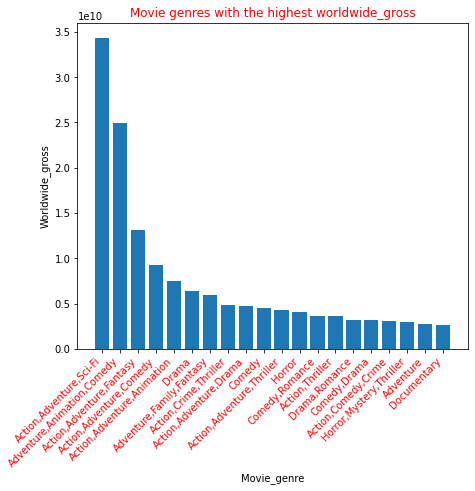

In [166]:
plt.figure(figsize=(7,6))
plt.bar(x, y)
plt.xticks(rotation=45, ha='right' , color = "red")
plt.title("Movie genres with the highest worldwide_gross" , color = "red")
plt.xlabel("Movie_genre")
plt.ylabel("Worldwide_gross")
plt.show();

#plt.savefig("Genres on worldwide_gross.jpeg");



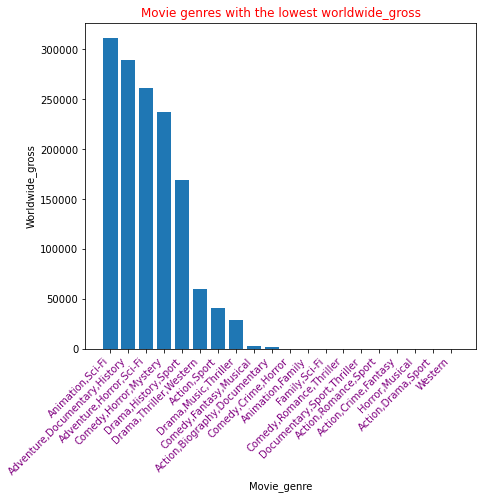

In [168]:
plt.figure(figsize=(7,6))
plt.bar(x1, y1)
plt.xticks(rotation=45, ha='right' , color = "purple")
plt.title("Movie genres with the lowest worldwide_gross" , color = "red")
plt.xlabel("Movie_genre")
plt.ylabel("Worldwide_gross")
plt.show();

#plt.savefig("Genres on worldwide_gross.jpeg");

### Recommendation 1

Based on the bar chart presentation above , the genre that seems to generate the highest gross income world_wide would be the combined Action,Adventure,Sci-Fi genre while the genres generating the least amount of gross income are the combined Action,Drama,Sport genre as well as Western among others. Given the findings , if Microsoft wishes to generate the highest gross income then the combined Action,Adventure,Sci-Fi genre would be most recommended

### 1.2 Which genres had the highest profit?

In [113]:
final_merge_df.head()

,movie_id,primary_title,original_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,1.9,8248
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,6.1,14828
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,6.1,37886
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,7.3,275300
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0,6.5,105116


In [117]:
#let us now add a column to the dataframe indicating the profit based on production budget
final_merge_df["gross_profit"] = ((final_merge_df["worldwide_gross"]) - (final_merge_df["production_budget"]))

<ipython-input-117-39e2b163294f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merge_df["gross_profit"] = ((final_merge_df["worldwide_gross"]) - (final_merge_df["production_budget"]))


In [118]:
final_merge_df.head()

,movie_id,primary_title,original_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,gross_profit
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,1.9,8248,-44926294.0
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,6.1,14828,965996.0
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,6.1,37886,-15686698.0
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,7.3,275300,96861183.0
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0,6.5,105116,34108587.0


In [121]:
#We have now included the profits column and the negative values in the column indicate a loss
#Let us now create a groupby table with the genres and gross_profit columns
gross_profit_df = final_merge_df[["genres" ,"gross_profit"]]
gross_profit_df = gross_profit_df.groupby("genres").sum().sort_values(by = ["gross_profit"],ascending = False)
gross_profit_df

,gross_profit
genres,
"Action,Adventure,Sci-Fi",2.522450e+10
"Adventure,Animation,Comedy",1.825716e+10
"Action,Adventure,Fantasy",8.133729e+09
"Action,Adventure,Comedy",6.863948e+09
"Action,Adventure,Animation",5.478379e+09
...,...
"Comedy,Western",-5.755305e+07
"Crime,Drama,History",-6.417069e+07
"Biography,Crime,Documentary",-6.718079e+07


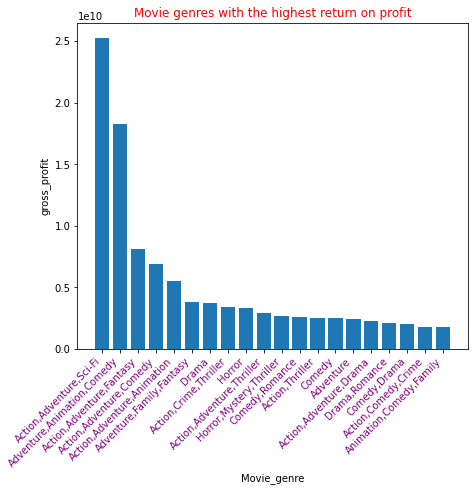

In [164]:
g1 = gross_profit_df.head(20).index
g2 = gross_profit_df["gross_profit"].head(20)

plt.figure(figsize=(7,6))
plt.bar(g1, g2)
plt.xticks(rotation=45, ha='right' , color = "purple")
plt.title("Movie genres with the highest return on profit" , color = "red")
plt.xlabel("Movie_genre")
plt.ylabel("gross_profit")
plt.show();

#plt.savefig("Genres on gross_profit.jpeg");

### Recommendation 2

Similar to the worldwide_gross income table, the genre that seems to generate the greatest income , having compensated for the production budget is the combined Action,Adventure,Sci-Fi genre which is the best choice putting return on investment into account and probably the Adventure,Animation,Comedy genre as a second choice

### 1.2 Which genres had the highest rating?

This analysis will have a look at the genres that are rated best by users/viewers

In [125]:
# Let us have a look at the dataset
final_merge_df.head()


,movie_id,primary_title,original_title,start_year,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,gross_profit
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,1.9,8248,-44926294.0
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,6.1,14828,965996.0
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,6.1,37886,-15686698.0
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,7.3,275300,96861183.0
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0,6.5,105116,34108587.0


In [129]:
import numpy as np

In [143]:
## We will now obtain the genres and averagerating columns for the analysis
rate_df = final_merge_df[["genres","averagerating"]]
rate_df

,genres,averagerating
0,"Action,Animation,Comedy",1.9
2,"Comedy,Mystery",6.1
3,"Adventure,Drama,Romance",6.1
6,"Adventure,Comedy,Drama",7.3
7,"Action,Crime,Drama",6.5
...,...,...
2869,Drama,5.7
2871,Drama,9.1
2872,Documentary,7.3
2873,"Biography,Drama",6.3


In [150]:
# We can now group the movies by genre and total average rating for each genre
rate_df = rate_df.groupby("genres").mean().sort_values(by = ["averagerating"],ascending = False)
rate_df

,averagerating
genres,
"Action,Documentary,Drama",8.70
"Drama,Mystery,War",8.30
"Adventure,Drama,Sci-Fi",8.30
"Crime,Documentary",8.25
"Documentary,Drama,History",8.10
...,...
Western,3.80
"Action,Romance,Sport",3.60
"Family,Sci-Fi",3.40


In [157]:
r1 =rate_df.head(20).index
r2 = rate_df["averagerating"].head(20)

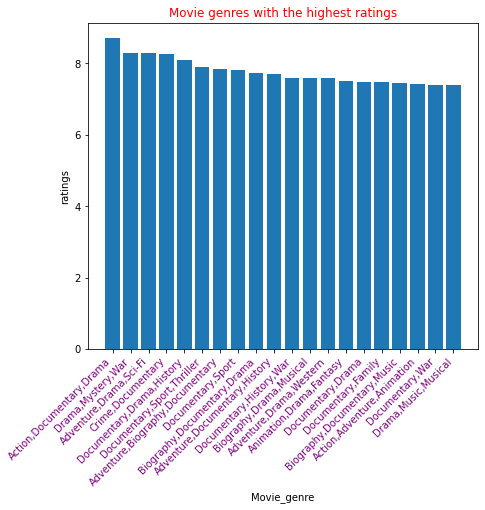

In [170]:
plt.figure(figsize=(7,6))
plt.bar(r1, r2)
plt.xticks(rotation=45, ha='right' , color = "purple")
plt.title("Movie genres with the highest ratings" , color = "red")
plt.xlabel("Movie_genre")
plt.ylabel("ratings")
plt.show();

#plt.savefig("Genres on ratings.jpeg");

In [219]:
#To confirm if number of votes does not affect the average rating
# import scipy as sp
# print(sp.stats.ttest_ind((final_merge_df["averagerating"]) , np.log2(final_merge_df["numvotes"])))

Ttest_indResult(statistic=-66.77359817968347, pvalue=0.0)


In [220]:
# plt.hist(np.log2(final_merge_df["averagerating"]) , bins = 50)
# plt.show()


In [221]:
# plt.hist(np.log2(final_merge_df["numvotes"]) , bins = 50)
# plt.show()

### Recommendaton 3

If microsoft intends on producing movies based on their ratings, then the recommended genre would be the combined Action,Documentary,Drama which has the highest ratings.

## 2. Bivariate Analysis

### 2.1 Is there any relationship between gross profits and ratings based on genre?

One might ask , are the  gross profits and ratings of the given genres related in any way?

In [175]:
profits_and_ratings_df= gross_profit_df.merge(rate_df , how = "inner", left_index = True , right_index = True )
profits_and_ratings_df

,gross_profit,averagerating
genres,,
"Action,Adventure,Sci-Fi",2.522450e+10,6.660000
"Adventure,Animation,Comedy",1.825716e+10,6.317647
"Action,Adventure,Fantasy",8.133729e+09,6.185294
"Action,Adventure,Comedy",6.863948e+09,6.392857
"Action,Adventure,Animation",5.478379e+09,7.429412
...,...,...
"Comedy,Western",-5.755305e+07,5.150000
"Crime,Drama,History",-6.417069e+07,6.633333
"Biography,Crime,Documentary",-6.718079e+07,7.100000


In [222]:
# let us now plot a line graph to see the averagerating variation from the mean
# plt.figure(figsize=(7,6))
# plt.plot((np.log2(profits_and_ratings_df["gross_profit"])).head(30),np.log2(profits_and_ratings_df["averagerating"]).head(30) )
# plt.xticks(rotation=45, ha='right' , color = "purple")
# plt.title("Movie genres with the highest return on profit" , color = "red")
# plt.xlabel("gross_profit")
# plt.ylabel("averagerating")
# plt.show();

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


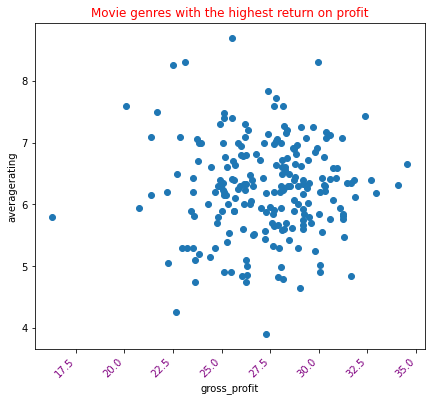

In [218]:
# scatter plot
plt.figure(figsize=(7,6))
plt.scatter(np.log2(profits_and_ratings_df["gross_profit"]),(profits_and_ratings_df["averagerating"]) )
plt.xticks(rotation=45, ha='right' , color = "purple")
plt.title("Movie genres with the highest return on profit" , color = "red")
plt.xlabel("gross_profit")
plt.ylabel("averagerating")
plt.show();

In this case , the gross profits and ratings of a movie have a linear relationship with each another and you can predict the profits based on the  scatter plot diagram

### 2.2 Is there any relationship between the production_budget and ratings?

This may come about when tring to identify whether the production budget has any relationship  with the movie success in terms of ratings